### 1. Setup: Libraries & Configuration

In [106]:
#Standard libraries
import sys
sys.path.append('../src')

#Third party libraries
from itertools import permutations
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


#Custom libraries
from config import YFINANCE_CLEAN
from constants import contract_sizes, tons_conversion
from strategy import backtest
from utils import pnl_trades, backtest_performance, strategy_describe
from visualization import backtest_charts


pd.set_option('display.max_columns', None)

### 2. Load data and strategy definition

In [107]:
df = pd.read_parquet(YFINANCE_CLEAN)
backtest_strategy = 'spread'


### 3. Check describe of the selected strategy

In [ ]:
df_strategy = strategy_describe(df, tons_conversion, backtest_strategy=backtest_strategy)

df_strategy.describe()

,heating_oil/crude_oil,heating_oil/wheat,heating_oil/soybean_meal,heating_oil/corn,heating_oil/soybean_oil,heating_oil/soybean,crude_oil/heating_oil,crude_oil/wheat,crude_oil/soybean_meal,crude_oil/corn,crude_oil/soybean_oil,crude_oil/soybean,wheat/heating_oil,wheat/crude_oil,wheat/soybean_meal,wheat/corn,wheat/soybean_oil,wheat/soybean,soybean_meal/heating_oil,soybean_meal/crude_oil,soybean_meal/wheat,soybean_meal/corn,soybean_meal/soybean_oil,soybean_meal/soybean,corn/heating_oil,corn/crude_oil,corn/wheat,corn/soybean_meal,corn/soybean_oil,corn/soybean,soybean_oil/heating_oil,soybean_oil/crude_oil,soybean_oil/wheat,soybean_oil/soybean_meal,soybean_oil/corn,soybean_oil/soybean,soybean/heating_oil,soybean/crude_oil,soybean/wheat,soybean/soybean_meal,soybean/corn,soybean/soybean_oil
count,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000
mean,1.295309,3.153499,1.849367,3.931056,0.764007,1.693842,0.782018,2.448913,1.442234,3.070607,0.595124,1.319405,0.342492,0.440056,0.591979,1.257236,0.246686,0.543868,0.597224,0.769315,1.759716,2.183189,0.429850,0.930753,0.275586,0.355634,0.814641,0.475940,0.198104,0.436519,1.397178,1.799761,4.164401,2.438203,5.156941,2.225653,0.637395,0.820249,1.885743,1.084608,2.335458,0.457393
std,0.161332,0.815838,0.565210,1.135812,0.189570,0.449919,0.090566,0.644322,0.472518,0.970940,0.157031,0.376466,0.103719,0.139215,0.128128,0.205740,0.040298,0.090127,0.198284,0.263972,0.340387,0.413584,0.091794,0.090370,0.078202,0.105749,0.122536,0.097267,0.029075,0.061084,0.373415,0.493514,0.693309,0.537246,0.755653,0.301101,0.188172,0.246335,0.292617,0.105972,0.323971,0.060503
min,-0.996321,0.996524,0.606545,1.585944,0.346230,0.626283,-1.003693,-1.381186,-0.884521,-2.250740,-0.486175,-0.917031,0.164039,-0.724015,0.327308,0.841661,0.142110,0.343445,0.261487,-1.130556,0.816216,1.261735,0.223922,0.707565,0.119050,-0.444298,0.398232,0.258520,0.123251,0.269411,0.732273,-2.056870,2.460088,1.392563,3.413002,1.532042,0.308935,-1.090476,1.023035,0.790833,1.602719,0.307450
25%,1.180170,2.521149,1.382105,3.118882,0.625991,1.346913,0.726516,1.988945,1.082871,2.361980,0.475580,1.039820,0.267578,0.346336,0.507991,1.130765,0.215561,0.482859,0.452020,0.582733,1.545055,1.883003,0.349721,0.872551,0.218306,0.276250,0.737761,0.403463,0.174736,0.392017,1.151272,1.461328,3.628947,2.007139,4.569796,1.986605,0.507264,0.648039,1.694158,1.009364,2.097754,0.406002
50%,1.280768,3.199635,1.830388,3.808871,0.762190,1.724687,0.780743,2.384290,1.359497,2.782708,0.580467,1.283140,0.312536,0.419388,0.567435,1.244926,0.244087,0.535412,0.546332,0.735445,1.762318,2.195688,0.426107,0.926708,0.262545,0.359359,0.803261,0.455438,0.196157,0.430495,1.312009,1.722624,4.096899,2.346827,5.097947,2.170441,0.579815,0.779111,1.867720,1.079088,2.322909,0.460736
75%,1.376370,3.737225,2.212290,4.580734,0.868604,1.971361,0.847254,2.887039,1.715911,3.619281,0.684273,1.542732,0.396645,0.502735,0.647226,1.355452,0.275562,0.590264,0.723534,0.923362,1.968538,2.478545,0.498222,0.990723,0.320628,0.423363,0.884357,0.531067,0.218828,0.476700,1.597467,2.102549,4.639048,2.859426,5.722923,2.463041,0.742439,0.961582,2.070997,1.146064,2.550912,0.503371
max,3.066612,6.096109,3.824281,8.399821,1.365611,3.236929,0.992529,4.605497,3.252265,6.447918,1.078114,2.756952,1.003488,2.711828,1.225166,2.511101,0.406490,0.977483,1.648682,4.302116,3.055226,3.868166,0.718100,1.264490,0.630539,1.643650,1.188127,0.792559,0.292997,0.623940,2.888254,7.544768,7.036826,4.465842,8.113516,3.252559,1.596721,4.120441,2.911677,1.413299,3.711799,0.652723


### 4. Input strategy parameters

In [114]:
start_date = '2010-01-01'
end_date = '2025-04-25'

commodity_chosen = 'soybean_oil'
commodity_spread = 'soybean'

down_entry = 1.99
up_exit = 2.46

contract_size = contract_sizes[commodity_chosen]


### 5. Backtest execution

In [115]:

df_trades, position_open = backtest(
    backtest_strategy=backtest_strategy,
    start_date=start_date,
    end_date=end_date,
    df=df,
    up_exit=up_exit,
    down_entry=down_entry,
    commodity_chosen=commodity_chosen,
    commodity_spread=commodity_spread,
    tons_conversion=tons_conversion,
    contract_size=contract_size
)


### 6. PnL

In [116]:
df_trades_final, mtm_trade = pnl_trades(
    df_trades=df_trades,
    df_prices=df,
    commodity_chosen=commodity_chosen,
    tons_conversion=tons_conversion,
    contract_size=contract_size,
    position_open=position_open
)


### 7. Charts

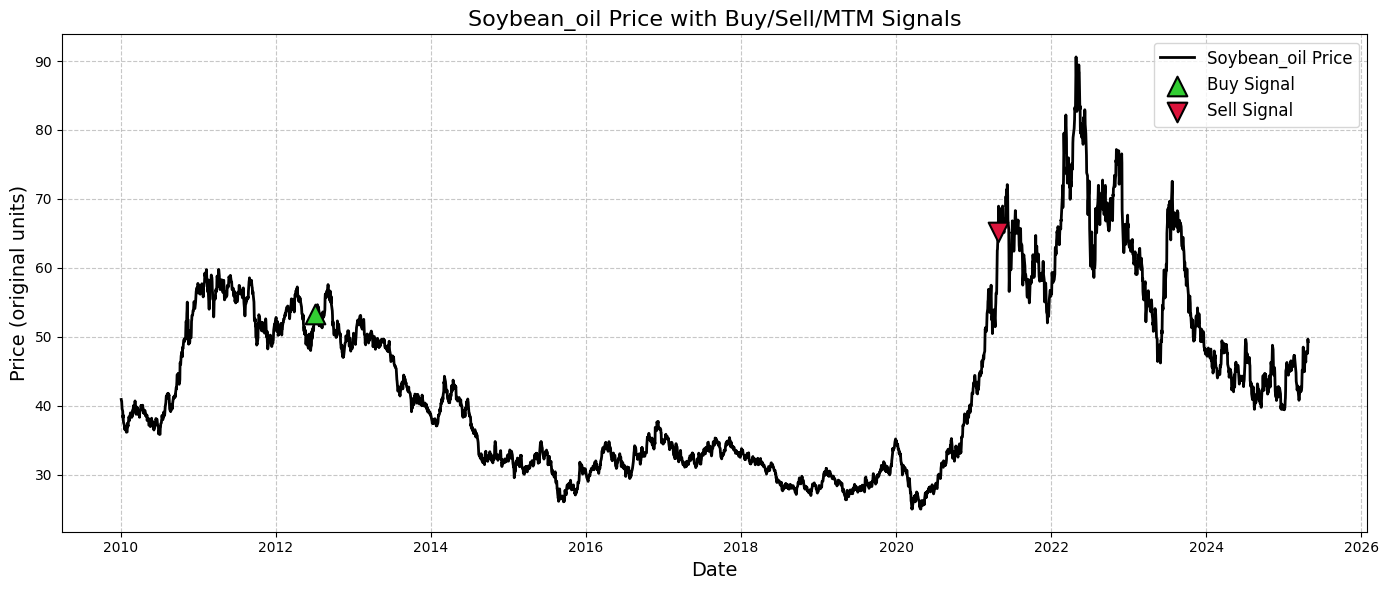

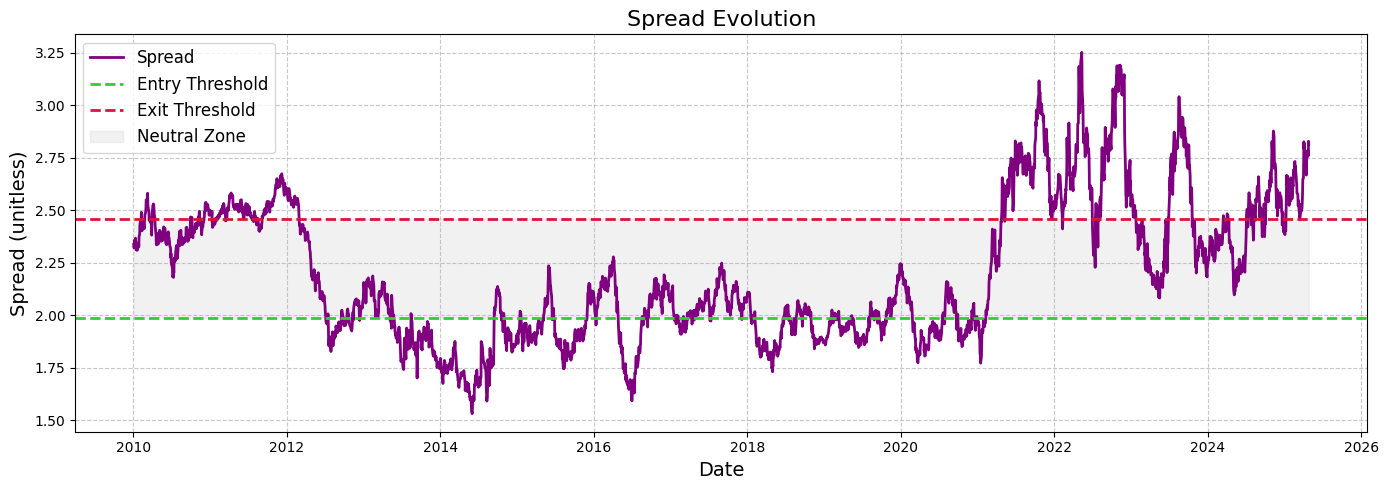

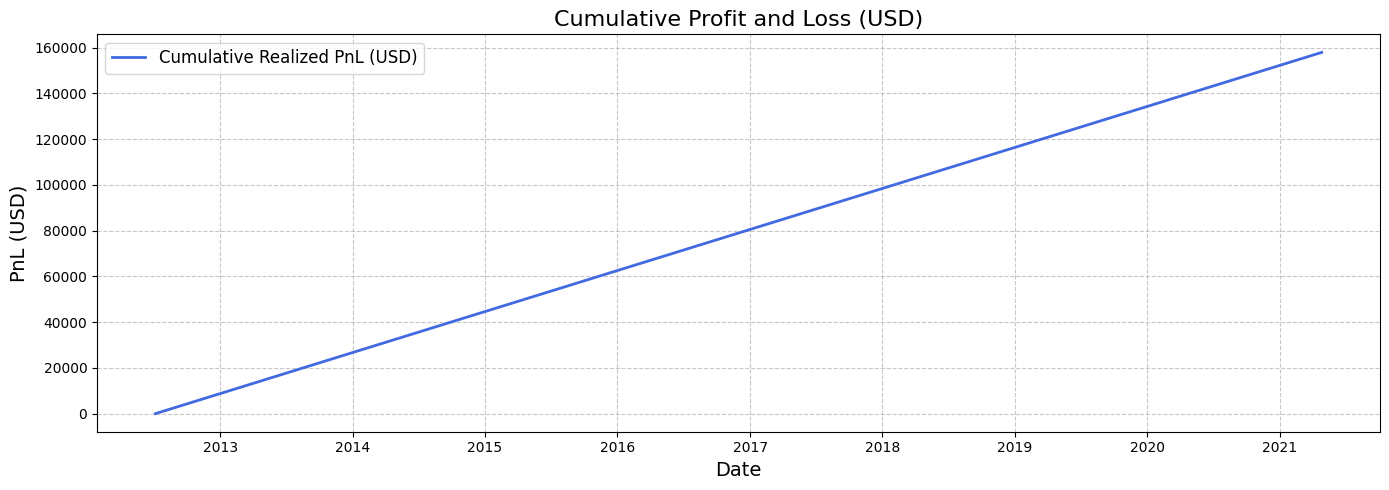

In [117]:
backtest_charts(
    df_prices=df,
    df_trades=df_trades_final,
    commodity_chosen=commodity_chosen,
    down_entry=down_entry,
    up_exit=up_exit,
    start_date=start_date,
    end_date=end_date,
    mtm_trade=mtm_trade,
    tons_conversion=tons_conversion
)


### 8. Performance analysis

In [118]:
summary = backtest_performance(df_trades_final, df, mtm_trade)
display(summary)


,Metric,Value
0,Total Buys,1.000000
1,Total Sells,1.000000
2,Complete Trades,1.000000
3,Open Positions,0.000000
4,Realized Profit (USD),157964.640562
5,MTM Adjustment (USD),0.000000
6,Total Profit (USD),157964.640562
7,Win Rate (%),100.000000
8,Max Drawdown (USD),0.000000
9,Sharpe Ratio,11.224972
